In [1]:
# Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Visualizing Charts.
plt.rcParams['figure.figsize']=[15,6]

from IPython.display import display, HTML                                             ## Increasing width of notebook.
display(HTML("<style>.container { width:88% !important; }</style>"))

In [2]:
# Import the data.
sales = pd.read_csv('train_v9rqX0R.csv')

In [3]:
# Missing Values.
sales.isnull().sum()[sales.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [4]:
sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### Choosing right category to find missing value of Item_Weight :

In [5]:
# On Item_Fat_Content :

In [6]:
sales.loc[sales.Item_Fat_Content=='Low Fat','Item_Weight'].median()

12.8

In [7]:
sales.groupby('Item_Fat_Content')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
LF,260.0,12.803212,4.742429,4.920,8.90500,12.15,17.5000,21.25
Low Fat,4222.0,12.953079,4.654783,4.590,8.76000,12.80,17.1000,21.35
Regular,2388.0,12.705840,4.624503,4.555,8.84000,12.50,16.7000,21.20
low fat,84.0,12.563988,4.347294,5.485,8.84500,12.50,16.7125,21.25
reg,106.0,12.842642,4.581413,5.460,8.52625,13.00,16.7000,20.85


In [8]:
# On Item_Identifier :

In [9]:
sales.groupby('Item_Identifier')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,,,,,,,,
DRA12,6.0,11.600,0.000000e+00,11.600,11.600,11.600,11.600,11.600
DRA24,5.0,19.350,0.000000e+00,19.350,19.350,19.350,19.350,19.350
DRA59,6.0,8.270,1.945901e-15,8.270,8.270,8.270,8.270,8.270
DRB01,2.0,7.390,0.000000e+00,7.390,7.390,7.390,7.390,7.390
DRB13,5.0,6.115,0.000000e+00,6.115,6.115,6.115,6.115,6.115
...,...,...,...,...,...,...,...,...
NCZ30,6.0,6.590,9.729507e-16,6.590,6.590,6.590,6.590,6.590
NCZ41,5.0,19.850,0.000000e+00,19.850,19.850,19.850,19.850,19.850
NCZ42,5.0,10.500,0.000000e+00,10.500,10.500,10.500,10.500,10.500


In [10]:
sales.loc[sales.Item_Identifier=='FDP10','Item_Weight']

7        NaN
585     19.0
2623    19.0
3382    19.0
4585    19.0
6087    19.0
7883    19.0
Name: Item_Weight, dtype: float64

### Using Item_Identifier to fill missing value :

In [11]:
dict_=sales.groupby('Item_Identifier')['Item_Weight'].median().to_dict

In [12]:
# Filling missing values using dict_ median values :  Can be done either way


#sales['Item_Weight'] = sales.groupby('Item_Identifier')['Item_Weight'].fillna(dict_)

sales['Item_Weight'] = sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.median()))

In [13]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# Checking Enteries where Item_Weight is still Null.
sales.loc[sales.Item_Weight.isnull()]

# Inference : These Item are single product thats why median is not found for them.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [15]:
# Using Item_type to find the value now based on Item_Type.
Frozen_Weight = sales.loc[sales.Item_Type== 'Frozen Foods','Item_Weight'].median()
Snack_Weight =  sales.loc[sales.Item_Type== 'Snack Foods','Item_Weight'].median()
Dairy_Weight =  sales.loc[sales.Item_Type== 'Dairy','Item_Weight'].median()
Baking_Weight = sales.loc[sales.Item_Type== 'Baking Goods','Item_Weight'].median()

In [16]:
# Filling missing Values.
sales.loc[927,'Item_Weight'] = Frozen_Weight
sales.loc[1922,'Item_Weight'] = Snack_Weight
sales.loc[4187,'Item_Weight'] = Dairy_Weight
sales.loc[(sales.Item_Type == 'Baking Goods')&(sales.Item_Weight.isnull()),'Item_Weight'] = Baking_Weight

In [17]:
# Checking missing values.
sales.isnull().sum()

## or

# sales.loc[sales.Item_Weight.isnull()]

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
# Calculate the standard deviation of target and predictor variables.
sales.std()

Item_Weight                     4.645031
Item_Visibility                 0.051598
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

-- Note : Sample std deviation and std deviation - Difference (Google it.)
* When having same std deviation of multiple case then we find Coefficient of variation (cv)
* cv = ( sample std deviation / Sample mean )
* Lower CV better the case.
* Higher CV worse the case.

In [19]:
# Calculate the Coefficient of Variation in the Data.
sales.std()/sales.mean()

Item_Weight                  0.360769
Item_Visibility              0.780224
Item_MRP                     0.441690
Outlet_Establishment_Year    0.004190
Item_Outlet_Sales            0.782335
dtype: float64

#### Interpretation of CV :
* Coefficient of Variation suggests which of the categories have the lowest variation with respect to mean.
* It is calculated as std/mean which means what %age of the data is deviating from the mean.
* Higher the CV, less reliable that variable in the data is.
* Lower the CV, we can count on that feature more.

Note : Low CV is always preferred when comparing two or more products/ employees/ sports player/ stocks, etc.


#### Kurtosis :
* Tells you the shape of the Data.
* It tells us by looking at the **Peakedness of the Data**.
* Here Peakedness of the Data represents **heavy tails** or **light tails**.
* The normal distribution curve can be divided in 03 parts - **Mesokurtic curve, PlatyKurtic and LeptoKurtic Curve**.

Note : Normal Distribution is **MesoKurtic Curve** with a Kurtosis of **3**.

Note : If any curve has a Kurtosis of < 3, PlatyKurtic Curves and if it is > 3, It is LeptoKurtic.

Note : **The Std Relation is Skewness = 0 and Kurtosis = 3 for the Data to be normal**.

In [20]:
sales.kurt()
## All the variable are PlatyKurtic.

Item_Weight                 -1.229869
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

# Scaling :
1. standard scaler
2. min max scaler

1. Standard Scaler : The StandardScaler is a method of standardizing data such the the transformed feature has 0 mean and and a                            standard deviation of 1.
                     The standard score of a sample x is calculated as:     
  **z = (x - u) / s**
                     
2. Min Max Scaler : There is another way of data scaling, where the minimum of feature is made equal to zero and the maximum of   feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.
             
  **Formula = Xi - min()/ (max - min)**
     
Note : Use Min Max Scaler when there is no Outlier.

In [21]:
df = sales.select_dtypes(include=np.number)
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [120]:
# Initiate the Machine.
sc = StandardScaler()
mmax = MinMaxScaler()

## 1.Standard Scaler :

In [24]:
# Fit transform

scaled = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [25]:
scaled.describe()
# Mean is 0.
# Std deviation is 1.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,4.538133e-16,-8.548444e-17,-1.644427e-16,1.135381e-14,1.631662e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.791344e+00,-1.281758e+00,-1.761688e+00,-1.532846e+00,-1.258790e+00
25%,-8.806403e-01,-7.586531e-01,-7.574307e-01,-1.293934e+00,-7.894057e-01
50%,-4.851951e-02,-2.364792e-01,3.243893e-02,1.395408e-01,-2.267687e-01
75%,8.557256e-01,5.514755e-01,7.170372e-01,7.368218e-01,5.391513e-01
max,1.824560e+00,5.083050e+00,2.021724e+00,1.334103e+00,6.391045e+00


## 2. MInMax Scaler :

In [26]:
# Min Max Scaler Transformation.
scaled_mmax = pd.DataFrame(mmax.fit_transform(df), columns = df.columns)

In [27]:
scaled_mmax.describe()

# Min is 0.
# Max is 1.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.495407,0.201382,0.465635,0.534661,0.164551
std,0.276572,0.157123,0.264327,0.348823,0.130729
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251861,0.082187,0.265437,0.083333,0.061359
50%,0.481989,0.164228,0.474209,0.583333,0.134908
75%,0.732063,0.288026,0.655156,0.791667,0.235030
max,1.000000,1.000000,1.000000,1.000000,1.000000


# SUMMARY :
### About Normal Distribution :
* It is a bell shaped curve.
* The total area under the curve is 1.
* The probability under the AUC is between 0 and 1.
* The Normal Distribution can be converted into standard normal distribution where the mean of the data will be 0 and SD will be 1.

**Empirical Rule :**
* 68% of Data lies in one standard devitation in normal distribution.
* 95% of Data lies between 2 std deviation.
* 99.7% of Data lies between 3 std deviation.

Note : Any value that lies above 3 sigma or below 3 sigma is an Outlier.


# Cat Variable :
* One Hot Encoding    : Gives identity matrix.
* Label Encoding      : When there is order in category use label encoding. eg- Outlet_Size (Large > Medium > Small) DOne only on target variable.
* Frequency Encoding.
* Target Encoding.
* Ordinal Encoding.

**Note on One Hot Encoding and Label Encoding** :
* One Hot Encoding encodes the data in 0 and 1.
* It means each and every column is 0 and 1 at the same time.
* It is popularly used for those categorical variables which has no order.
* In case the categorical variables have order, then it makes sense to use label Encoder.
* One Hot Encoder converts all the categories in 0 and 1 and therefore, iy generates as many new columnsas the count of categories.
* IN case of Label Encoding, it is used when the categories are Ordinal in Nature. It means that the categories have a certain order and we can say that 3>2>1.
* The key aspect of LE is that encodes the categories alphabatically.

In [28]:
sales.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [29]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [30]:
# Problem with One Hot Encoding.
pd.get_dummies(sales).shape

(8523, 1605)

In [31]:
sales.shape

(8523, 12)

In [32]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


### Frequency Encoding :

In [33]:
# On Item_Type.
mapped=sales.Item_Type.value_counts(normalize=True).to_dict()

# Fq encoding will not work perfectly if two categories have same value
# Should be used when every category has different values.

In [34]:
sales['Item_Type_Percent'] = sales.Item_Type.map(mapped)

In [35]:
# On Outlet_Identifier.
sales.Outlet_Identifier.value_counts(normalize=True)

# Since Outlet 49,46,35 have same fq encoding thats why we cant have it as encoding.

OUT027    0.109703
OUT013    0.109351
OUT049    0.109117
OUT046    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: Outlet_Identifier, dtype: float64

#### Target encoding for Outlet ID :

In [36]:
mapped = sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median().to_dict()

In [37]:
sales['Outlet_ID'] = sales.Outlet_Identifier.map(mapped)

In [38]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Percent,Outlet_ID
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,1966.1074
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,1655.1788
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.049865,1966.1074
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0.144550,250.3408
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640


In [39]:
## Checking Correlation btw Item_Outlet_sales and Outlet_Id.

sales.loc[:,['Item_Outlet_Sales','Outlet_ID']].corr()


# It shows 48% correlation which is good correlation to go with.

,Item_Outlet_Sales,Outlet_ID
Item_Outlet_Sales,1.000000,0.489391
Outlet_ID,0.489391,1.000000


## Binning the Cat Variable :

In [40]:
sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [41]:
# Perishables and Non Perishables.
perish = ['Dairy','Meat', 'Fruits and Vegetables','Breakfast','Breads', 'Starchy Foods','Seafood']

In [42]:
def perish_able(x):
    if x in perish:
        return ('Perishables')
    else:
        return ('Non_Perishables')

In [43]:
sales['Item_Type_Cat'] = sales.Item_Type.apply(perish_able)

In [44]:
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Percent,Outlet_ID,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,1966.1074,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,1655.1788,Non_Perishables


In [45]:
# Drop the  Outlet Est Year and Outlet ID.

newsales = sales.drop(['Outlet_Establishment_Year','Outlet_Identifier'],axis = 1)

In [47]:
newsales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Percent,Outlet_ID,Item_Type_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,1966.1074,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,1655.1788,Non_Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,0.049865,1966.1074,Perishables
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800,0.144550,250.3408,Perishables
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640,Non_Perishables


## Feature Engineering :

* Extracting new feature from exisiting feature.

In [ ]:
# Extracting the first 02 letters from the Item ID.

In [48]:
ids= []

for i in newsales.Item_Identifier:
    ids.append(i[:2])

In [49]:
newsales['Item_Identifier'] = pd.Series(ids)

In [50]:
newsales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Percent,Outlet_ID,Item_Type_Cat
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,1966.1074,Perishables
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,1655.1788,Non_Perishables


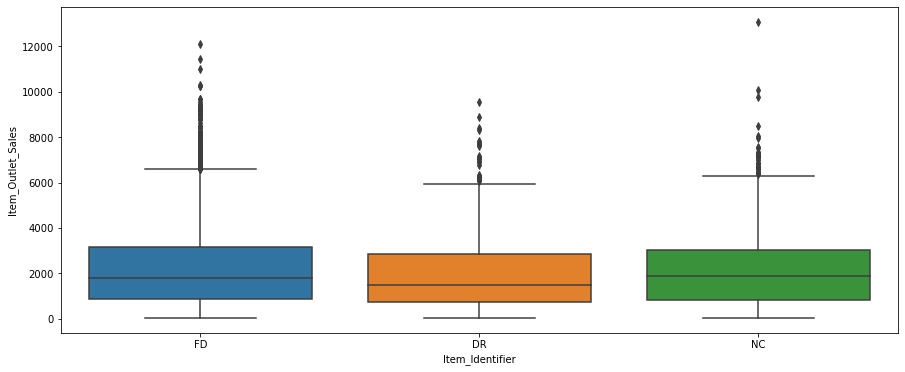

In [52]:
# Checking pattern : Boxplot btw Id and sales.
sns.boxplot(newsales.Item_Identifier,newsales.Item_Outlet_Sales)
plt.show()

In [53]:
# Item Fat Content 

newsales.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [54]:
newsales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],
                                 value = ['Low Fat','Low Fat','Regular'],inplace=True)

In [56]:
newsales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Percent,Outlet_ID,Item_Type_Cat
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,1966.1074,Perishables
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,1655.1788,Non_Perishables


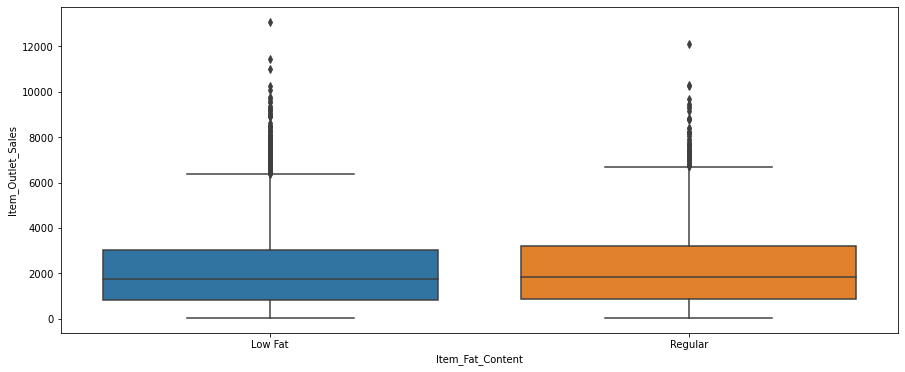

In [58]:
sns.boxplot(newsales.Item_Fat_Content,newsales.Item_Outlet_Sales)
plt.show()

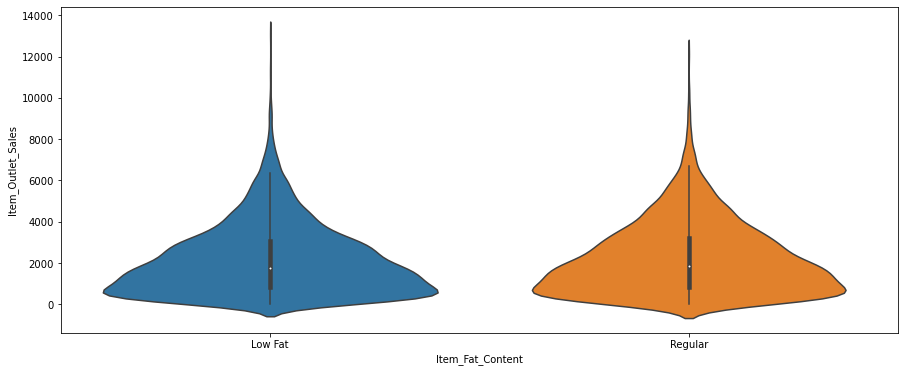

In [61]:
sns.violinplot(newsales.Item_Fat_Content,newsales.Item_Outlet_Sales)
plt.show()

In [63]:
# Replacing the Item fat content with non edible where the item id is NC.

newsales.loc[newsales.Item_Identifier=='NC', 'Item_Fat_Content'] = 'Non Edible'

In [66]:
# Replacing 0s in Item Visibility
newsales['Item_Visibility'] = newsales.groupby('Item_Identifier')['Item_Visibility'].transform(lambda
                                                                x:x.replace(to_replace = 0, value = x.median()))

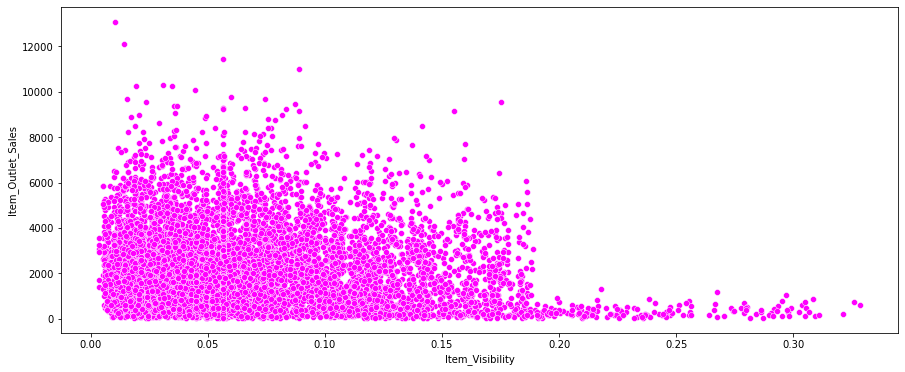

In [68]:
sns.scatterplot(x='Item_Visibility', y = 'Item_Outlet_Sales',
               data = newsales, color = 'magenta')
plt.show()

In [70]:
# Impute the Outlet size with Mode
newsales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [84]:
pd.DataFrame(newsales.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Type'].count()).T

Outlet_Type          Grocery Store        Supermarket Type1                \
Outlet_Location_Type        Tier 1 Tier 3            Tier 1 Tier 2 Tier 3   
Outlet_Type                    528    555              1860   2785    932   

Outlet_Type          Supermarket Type2 Supermarket Type3  
Outlet_Location_Type            Tier 3            Tier 3  
Outlet_Type                        928               935

In [82]:
pd.DataFrame(newsales.groupby(['Outlet_Size','Outlet_Location_Type'])['Outlet_Type'].count()).T

Outlet_Size            High Medium         Small       
Outlet_Location_Type Tier 3 Tier 1 Tier 3 Tier 1 Tier 2
Outlet_Type             932    930   1863   1458    930

In [88]:
# Mode Impuatation 
value = newsales.Outlet_Size.mode()[0]
newsales.Outlet_Size.fillna(value, inplace = True)

In [89]:
# Print all the sales value where the Standard Deviation is > 2.

def zscore(x):
    avg = x.mean()
    std = x.std()
    zscore = (x-avg)/std
    return(zscore)

In [90]:
newsales['z_sales'] = zscore(sales.Item_Outlet_Sales)

In [92]:
newsales.loc[newsales['z_sales'] > 2, 'Item_Outlet_Sales']

43      6768.5228
47      5815.0972
55      6258.5200
115     5942.2650
130     7968.2944
          ...    
8350    7240.5750
8395    5992.2000
8447    7588.1226
8485    6261.8490
8510    7182.6504
Name: Item_Outlet_Sales, Length: 405, dtype: float64

In [93]:
newsales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Percent,Outlet_ID,Item_Type_Cat,z_sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,1966.1074,Perishables,0.910548
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,1655.1788,Non_Perishables,-1.018381
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,0.049865,1966.1074,Perishables,-0.049235
3,FD,19.20,Regular,0.056406,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,0.144550,250.3408,Perishables,-0.849053
4,NC,8.93,Non Edible,0.044999,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640,Non_Perishables,-0.695332


## Outlier Removal :

<AxesSubplot:>

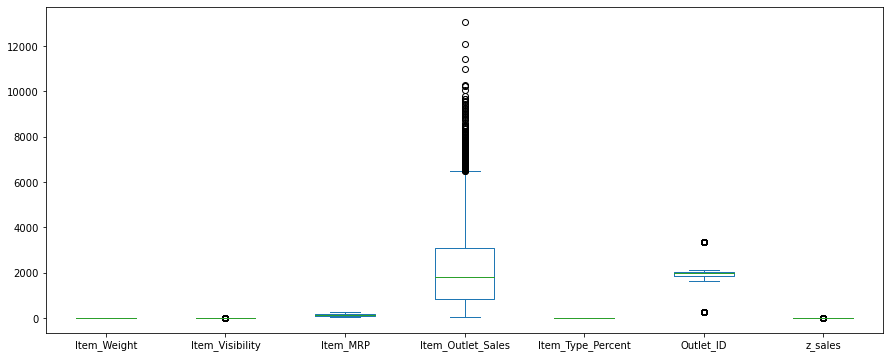

In [94]:
newsales.plot(kind = 'box')

* Using BoxPlot :: **Any value > Q3+1.5 * IOR**    or    **Any value < Q1-1.5*IOR** is known as Outlier.
* Using Z score :: If **Z score is >3** or **Z score is < -3** is termed as Outlier

### Using IOR :

In [105]:
# Calculate the IQR and other Quantiles.

q1 = newsales.quantile(0.25)
q3 = newsales.quantile(0.75)
iqr = q3 - q1

upper_lim = q3+1.5*iqr
lower_lim = q1-1.5*iqr

In [117]:
# Condition.

newsales.loc[~((newsales < lower_lim) | (newsales > upper_lim)).any(axis = 1)]

# if "~" is not applied will give Outlier Data.
# .any(axis = 1) : returns any row where the condition are met
# " | " : Either or that means if the conditions are met either in lower limit or upper limit.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Percent,Outlet_ID,Item_Type_Cat,z_sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,1966.1074,Perishables,0.910548
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,1655.1788,Non_Perishables,-1.018381
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,0.049865,1966.1074,Perishables,-0.049235
4,NC,8.930,Non Edible,0.044999,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640,Non_Perishables,-0.695332
5,FD,10.395,Regular,0.056406,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088,0.076030,1655.1788,Non_Perishables,-0.952054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,0.140795,2050.6640,Non_Perishables,0.349894
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,0.076030,1834.9448,Non_Perishables,-0.956346
8520,NC,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,0.061011,2109.2544,Non_Perishables,-0.579066
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,0.140795,1655.1788,Non_Perishables,-0.196713


### Using Z score :
1. Convert the Data into Z score values using standardsacler/fn.
2. Find the outliers and eliminate them.

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

In [125]:
# Fetch the list of Num variable only.
newsales.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type_Percent', 'Outlet_ID', 'z_sales'],
      dtype='object')

In [129]:
cols = ['Item_Weight','Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales','Outlet_ID']

for i in cols:
    newsales.loc[:,i] = sc.fit_transform(pd.DataFrame(newsales.loc[:,i]))

In [134]:
# Dropping unnecessary variables
newsales.drop(['Item_Type','z_sales'],axis = 1,inplace =True)

In [141]:
# Apply one hot encoding with drop_first = True
finaldata = pd.get_dummies(newsales,drop_first = True)

In [143]:
# Applying -3 and +3 sigma condition for outlier removal
finaldata.loc[~((finaldata < -3) | (finaldata > 3)).any(axis = 1)].shape

(8333, 18)

## Train Test Split :

In [144]:
# Library to Import Train and Test Split

from sklearn.model_selection import train_test_split

In [147]:
# Split the Data in X and Y.
X = sales.drop('Item_Outlet_Sales',axis = 1)
y = sales.Item_Outlet_Sales

In [148]:
# Split the X and y in train and test

xtrain, xtest ,ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0)

# random_state works as seed parameter.

In [150]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(6818, 14)
(6818,)
(1705, 14)
(1705,)


### Transformation :
* Log Transformation - It does not work on 0 or -ve variable.
* Square Root Transformation - It cannot work on -ve numbers.
* Power Transformation (1/x) - It cannot work on 0s.
* Boxcox Tranformation - Only +ve numbers. (Not even 0)
* Yeo Johnson Transformation - Can work on any numbers. (+ve or -ve)

Remember that the purpose of the tranformation is to reduce the skewness and trying to make the data normal.

You cannot make the data perfectly normal, however you can reduce the skewness a little bit.

### Summary :
* Log transformation, boxcox and yeo johnson returned -ve tranformation.
* Square root reduced the skewness for the target variable.
* In power transformation, it increases the skewness and seems like it is a good fit for -vely skewed data.

Note : The purpose of the Transformation is to reduce the skewness. So, if the data is quite close to Normal, then we skip this step
and directly build the model.

In [ ]:
X = 